
# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. Hence, Hotel TULIP would like you *Group-SIT742* (a hypothetical data analytics group with up to 3 data analysers) to analyse web log files and discover user accessing patterns of different web pages. 

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


## 1.Data ETL

### 1.1 Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from ipywidgets import IntProgress
import pandas as pd
from IPython.display import display
from zipfile import ZipFile


# Your file might be in a different location, so you need to customize the path
all_files = ZipFile('/content/drive/MyDrive/Colab Notebooks/HTWebLog_p1.zip', 'r')
files = all_files.namelist()

data = []
# Define the column names
ColumnNames=['date','time','s-sitename','s-ip','cs-method','cs-uri-stem','cs-uri-query','s-port','cs-username',
             'c-ip','cs(User-Agent)','cs(Referer)','sc-status','sc-substatus','sc-win32-status']
# Create a progress bar to track progress (importing data can take several minutes)
ProgressBar = IntProgress(value=0,min=0,max=len(files),step=1,
                          description='Loading:',bar_style='',orientation='horizontal')
display(ProgressBar)
# Read each of the files using the pandas read csv function within a 'for loop'
# and set data to str for each column to ensure all data loads
for name in all_files.namelist():
    ProgressBar.value += 1
    load_file = pd.read_csv(all_files.open(name),
                            delim_whitespace=True,
                            na_values='-',
                            skiprows = 4,
                            usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                            header=None,
                            encoding='iso-8859-1',
                            names=ColumnNames,
                            error_bad_lines=False,
                            warn_bad_lines=False,
                            dtype={'date': str,'time': str,'s-sitename': str, 's-ip': str,'cs-method': str,'cs-uri-stem': str,
                                   'cs-uri-query': str,'s-port': str,'cs-username': str,'c-ip': str,'cs(User-Agent)': str,
                                   'cs(Referer)': str, 'sc-status': str,'sc-substatus': str,'sc-win32-status': str})
    
    # There are rows with "#" in files, drop rows starts with "#"
    load_file = load_file[~load_file['date'].str.startswith("#")]
    
    data.append(load_file)

# Concatenate all the pandas dataframes into a single dataframe
df_ht = pd.concat(data)


print ('Finished loading', ProgressBar.value, 'web log files.')


IntProgress(value=0, description='Loading:', max=120)

Finished loading 120 web log files.


In [3]:
df_ht.head()

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200,0,0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,NaN,200,0,0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0


In [4]:
print(len(df_ht))

8438928


In order to reduce the processing time, we will remove all missing values for data and only select 30% of total data for classification. 

**Code**: 
    1. Remove all NAs, for the columns, if the column is with 15% NAs, you need to remove that column. Then, for the rows, if there are any NAs in that row, you need to remove that row (requests)  
    2. select 30\% of the total data in to a new dataframe weblog_df.
    
    *Keep the outputs for code in your notebook.

**Report**:
    The number of requests in weblog\_df.


In [5]:
#Your code to remove missing values as required.
for col in ColumnNames:
    if ((df_ht[col].isna().sum()*100)/df_ht['date'].count())>15:
        df_ht.drop(col, inplace=True, axis=1)
        
# Remove Raws with any null value
df_ht.dropna(inplace=True, axis=0)
df_ht.head(5)

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,s-port,c-ip,cs(User-Agent),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0


In [6]:
# only 30% of total data are selected for classification
weblog_df = df_ht.sample(frac = 0.3, random_state=1)

#Your code to show the number of requests in weblog_df
#number of requests in weblog df
print('Number of Request in weblog_df are: ', len(weblog_df))


Number of Request in weblog_df are:  2530620


### 1.2 Feature Selection

**Code**: 
    You are required to select *'cs_method'*,*'c_ip'*,*'cs_uri_stem'*,*'cs(User_Agent)'* as input features  and 'sc_status' as class label into a new dataframe ml_df for following Machine Learning Tasks. 

*Keep the outputs for code in your notebook.

**Report**:
    1. Data Description of ml_df,  
    2. Print top 5 rows of ml_df.



In [7]:
# Your code for feature selection
ml_df = weblog_df[['cs-method', 'c-ip', 'cs-uri-stem', 'cs(User-Agent)', 'sc-status']]
ml_df.describe()
feature_vars = ml_df.iloc[:, 0:4]
class_label_var = ml_df[['sc-status']]


#Your code to show the top 5 rows of ml_df
ml_df.head()


,cs-method,c-ip,cs-uri-stem,cs(User-Agent),sc-status
25357,GET,218.102.231.100,/Tulip/common/en-us/images/topmenu_zh-hk.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
89819,GET,218.190.226.30,/Tulip/common/en-us/images/top_logo.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
19333,GET,203.241.147.26,/Tulip/common/en-us/images/sectionbanner_about...,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304
29761,GET,203.85.132.97,/Tulip/public/2899_2.jpg,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
52909,GET,218.186.9.5,/Tulip/common/en-us/images/topmenu_zh-hk.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200


## 2.Unsupervised Learning
 You are required to complete this part only using **sklearn**.


**Code**: 
    1. Perform unsupervised learning on ml_df with K Means, with a varying K from 2 to 10;
    2. Plot in the elbow plot. 
    
    *Keep the outputs for code in your notebook.

**Report**:
    1. Figure 'KMeans' in the elbow plot, with a varying K from 2 to 10.



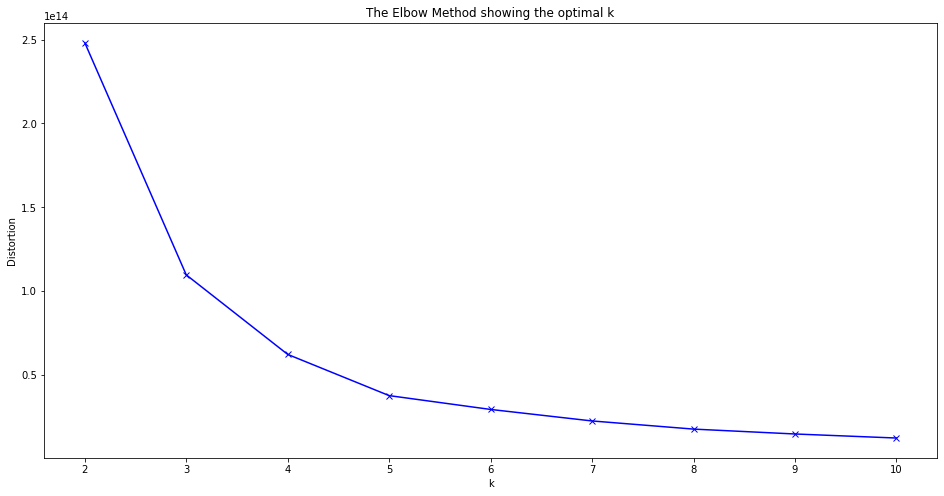

In [8]:
from sklearn import preprocessing
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 

le_df = ml_df.apply(preprocessing.LabelEncoder().fit_transform)


#Your code for Kmeans
distortions = []
K = range(2,11)
for k in K:
    kmeanModel =KMeans(n_clusters=k)
    kmeanModel.fit(le_df)
    distortions.append(kmeanModel.inertia_)

#Your code for visualizing K means result as elbow plot.
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-') 
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


## 3.Supervised Learning
 You are required to complete this part only using **PySpark**.


In [9]:
!apt-get update
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark 3.1.1
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
# unzip it
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
# install findspark 
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark 
findspark.init() 

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [60.9 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:13 https://developer.download.nvi

In [10]:
from pyspark.sql import SparkSession 
from pyspark.sql.types import *

spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

### 3.1 Data Preparation 

In order to reduce the processing time, we will select 10% of le_df.

In [21]:
schema = StructType([StructField("cs_method", IntegerType(), True),
                     StructField("c_ip", IntegerType(), True),
                     StructField("cs_uri_stem", IntegerType(), True),
                     StructField("cs(User_Agent)", IntegerType(), True),
                     StructField("sc_status", IntegerType(), True)])

sl_df = spark.createDataFrame(le_df, schema)

Exception ignored in: <function JavaWrapper.__del__ at 0x7f7cb49c1200>
Traceback (most recent call last):
  File "/content/spark-3.1.1-bin-hadoop3.2/python/pyspark/ml/wrapper.py", line 39, in __del__
    if SparkContext._active_spark_context and self._java_obj is not None:
AttributeError: 'MulticlassClassificationEvaluator' object has no attribute '_java_obj'


In [22]:
#Only 10% of the data is used in this part.
sl_df = sl_df.sample(fraction=0.1, seed=1)

In [23]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
# transformer
vector_assembler = VectorAssembler(inputCols=['cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)'],outputCol="features")
df_temp = vector_assembler.transform(sl_df)
df_temp.show(3)

+---------+-----+-----------+--------------+---------+--------------------+
|cs_method| c_ip|cs_uri_stem|cs(User_Agent)|sc_status|            features|
+---------+-----+-----------+--------------+---------+--------------------+
|        0|18825|       2741|          1385|        0|[0.0,18825.0,2741...|
|        0|68103|       2425|          1459|        0|[0.0,68103.0,2425...|
|        0|41459|       2087|          4238|        0|[0.0,41459.0,2087...|
+---------+-----+-----------+--------------+---------+--------------------+
only showing top 3 rows



In [24]:
df_sl = df_temp.drop('cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)')
df_sl.show(3)

+---------+--------------------+
|sc_status|            features|
+---------+--------------------+
|        0|[0.0,18825.0,2741...|
|        0|[0.0,68103.0,2425...|
|        0|[0.0,41459.0,2087...|
+---------+--------------------+
only showing top 3 rows



###  3.2 Decision Tree or Logistic Regression

 <div class="alert alert-block alert-info">

**Code**: 
    1. Perform supervised learning on ml\_df with Decision Tree or Logistic Regression,  <br>
    2. Evaluate the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    3. Evaluate the classification result using Precision, Recall and F1 score.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1. Display the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    2. Display the classification result using Precision, Recall and F1 score.
</div>

In [25]:
#Create the data sets for training and testing
(trainingData, testData) = df_sl.randomSplit([0.7, 0.3])

In [26]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Your code contains trainning from train data and predicting based on the test data
logr = LogisticRegression(featuresCol='features', labelCol='sc_status')
model = logr.fit(trainingData)
predict_train=model.transform(trainingData)
predict_test = model.transform(testData)


my_eval = MulticlassClassificationEvaluator( predictionCol='prediction', labelCol='sc_status',metricName="accuracy")

accuracy = my_eval.evaluate(predict_test)
print("accuracy : ",accuracy)


accuracy :  0.7198474390614071


In [27]:
# Your code to display TP, TN, FP, FN
from sklearn.metrics import confusion_matrix
y_true = predict_test.select(['sc_status']).collect()
y_pred = predict_test.select(['prediction']).collect()

print("Confusion Matrix: \n", confusion_matrix(y_true, y_pred))


Confusion Matrix: 
 [[54481     0     0    15     0     0     0     0     0     0]
 [  692     0     0     0     0     0     0     0     0     0]
 [    6     0     0     0     0     0     0     0     0     0]
 [    2     0     0    64     0     0     0     0     0     0]
 [19164     0     0     0     0     0     0     0     0     0]
 [    0     0     0     1     0     0     0     0     0     0]
 [    3     0     0     0     0     0     0     0     0     0]
 [ 1318     0     0     0     0     0     0     0     0     0]
 [   20     0     0     6     0     0     0     0     0     0]
 [    0     0     0     1     0     0     0     0     0     0]]


In [31]:
import numpy as np
cnf_matrix = confusion_matrix(y_true,y_pred)
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
cf_df= pd.DataFrame({'FP':FP,'FN':FN,'TP':TP,'TN':TN})
cf_df.head(11)

,FP,FN,TP,TN
0,21205,15,54481,72
1,0,692,0,75081
2,0,6,0,75767
3,23,2,64,75684
4,0,19164,0,56609
5,0,1,0,75772
6,0,3,0,75770
7,0,1318,0,74455
8,0,26,0,75747
9,0,1,0,75772


In [32]:
from sklearn.metrics import classification_report
# Your Code to display the classification results as required.
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.72      1.00      0.84     54496
           1       0.00      0.00      0.00       692
           2       0.00      0.00      0.00         6
           3       0.74      0.97      0.84        66
           4       0.00      0.00      0.00     19164
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00      1318
          10       0.00      0.00      0.00        26
          11       0.00      0.00      0.00         1

    accuracy                           0.72     75773
   macro avg       0.15      0.20      0.17     75773
weighted avg       0.52      0.72      0.60     75773



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.3 K-fold Cross-Validation
You are required to use K-fold cross validation to find out the best hyper-parameter set, where K = 2.
<div class="alert alert-block alert-info">

**Code**: 
Implement 2-fold cross validation for three (any three) classification models, where K = 2.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on hyper-parameters based on this cross-validation  results (Best results).
</div>

In [57]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier, LogisticRegression, DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
# K = 2
# Your code for 2-fold cross validation
lr = LogisticRegression(labelCol="sc_status", featuresCol="features", maxIter=10)

lrModel = lr.fit(trainingData)
predictions = lrModel.transform(testData)

revaluator = RegressionEvaluator(predictionCol="prediction", labelCol="sc_status", metricName="rmse")
# Create ParamGrid for Cross Validation
lrparamGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.001, 0.01, 0.1, 0.5, 1.0, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.25, 0.5, 0.75, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10])
             .build())
# Cross Validator
lrcv = CrossValidator(estimator = lr,
                    estimatorParamMaps = lrparamGrid,
                    evaluator = revaluator,
                    numFolds = 2)


# Run cross validations
lrcvModel = lrcv.fit(trainingData)
best_model = lrcvModel.bestModel
best_reg_param = best_model._java_obj.getRegParam()
best_elasticnet_param = best_model._java_obj.getElasticNetParam() 
best_maxIter_param = best_model._java_obj.getMaxIter()
print ("Best regular param:", best_reg_param)
print("Best elasticne param:", best_elasticnet_param)
print ("Best maxIter param:", best_maxIter_param)

Best regular param: 0.001
Best elasticne param: 0.0
Best maxIter param: 5


In [58]:
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'sc_status')
rfparamGrid = (ParamGridBuilder()
               .addGrid(rf.maxDepth, [2, 5])
               .addGrid(rf.maxBins, [5, 10])        
             .build())
rfcv = CrossValidator(estimator = rf,
                    estimatorParamMaps = rfparamGrid,
                    evaluator = revaluator,
                    numFolds = 2)
# Run cross validations
rfcvModel = rfcv.fit(trainingData)
best_model = rfcvModel.bestModel
best_max_depth = best_model.getMaxDepth()
best_max_bins = best_model.getMaxBins()
print ("Best max depth:", best_max_depth)
print("Best maximum bins:", best_max_bins)

Best max depth: 5
Best maximum bins: 5


In [60]:
# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="sc_status", featuresCol="features")
dtModel = dt.fit(trainingData)
pred = dtModel.transform(testData)

revaluator = RegressionEvaluator(predictionCol="prediction", labelCol="sc_status", metricName="rmse")
# Create ParamGrid for Cross Validation
dtparamGrid = (ParamGridBuilder()
               .addGrid(dt.maxDepth, [2, 5])
               .addGrid(dt.maxBins, [5, 10])
             .build())
# Cross Validator
dtcv = CrossValidator(estimator = dt,
                    estimatorParamMaps = dtparamGrid,
                    evaluator = revaluator,
                    numFolds = 2)
# Run cross validations
dtcvModel = dtcv.fit(trainingData)
best_model = dtcvModel.bestModel
best_max_depth = best_model.getMaxDepth()
best_max_bins = best_model.getMaxBins()
print ("Best max depth:", best_max_depth)
print("Best maximum bins:", best_max_bins)


Best max depth: 5
Best maximum bins: 10


## 4.Association Rule Mining
<div class="alert alert-block alert-info">

**Code**: 
Implement association rule mining with a suitable threshold for support, and confidence 
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on on ARMing results.
</div>

In [140]:
!pip install apyori

In [163]:
from sklearn import preprocessing

label_encoder_instance =  preprocessing.LabelEncoder()

def labelEncoder(ml_df,each):
    label_encoder_instance.fit(ml_df[each])
    print('Label Encoding ' , each)
    ml_df[each] = label_encoder_instance.transform(ml_df[each])

for each in ml_df.columns:
  labelEncoder(ml_df,each)

Label Encoding  cs-method


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Label Encoding  c-ip
Label Encoding  cs-uri-stem
Label Encoding  cs(User-Agent)
Label Encoding  sc-status


In [164]:
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# apply function:
encoded_df=ml_df.applymap(encode)

In [165]:
from mlxtend.frequent_patterns  import apriori
from mlxtend.frequent_patterns  import association_rules 

In [166]:
frequent_items = apriori(encoded_df, min_support = 0.07,use_colnames = True)
frequent_items.sort_values('support',inplace=True)
rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
# rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,"(cs(User-Agent), sc-status)","(cs-uri-stem, c-ip)",0.279993,0.999939,0.279993,1.0,1.000061,0.000017,inf
24,(sc-status),"(cs-uri-stem, c-ip)",0.280021,0.999939,0.280021,1.0,1.000061,0.000017,inf
3,"(cs(User-Agent), sc-status)",(cs-uri-stem),0.279993,0.999947,0.279993,1.0,1.000053,0.000015,inf
8,"(cs(User-Agent), sc-status, c-ip)",(cs-uri-stem),0.279993,0.999947,0.279993,1.0,1.000053,0.000015,inf
19,(sc-status),(cs-uri-stem),0.280021,0.999947,0.280021,1.0,1.000053,0.000015,inf


# Part II - Web Crawling

## Overview
In 2021, 
to better introduce and understand the research works on the professors,
Deakin university wants to perform the citation prediction on individual professor level.
You are required to implement a web crawler to crawl the *citation* information 
for A/Professor Gang Li from 2003 to 2021 (start at 2003 and end at 2021),
and also conduct several prediction coding tasks. 
You will need to make sure that 
the web crawling code and prediction code meets the requirements.
You are free to use any **Python** package for Web crawling and prediction 
by finishing below tasks.  


## 5.Crawl Gang Li citation information from 2003 to 2021

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to write the code to generate the csv for Gang Li's citation from 2003 to 2021
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [96]:
# Your code to crawl and generate the csv, and save it to variable create_df
#import pandas as pd
import requests
from bs4 import BeautifulSoup
url = "https://scholar.google.com/citations?user=dqwjm-0AAAAJ#d=gsc_md_hist"
request = requests.get(url)
content = request.content
soup = BeautifulSoup(content, 'lxml')
Year=[]
Citations =[]

for x in soup.find_all('span', class_='gsc_g_t'):
  Year.append(x.text)

for x in soup.find_all('span', class_='gsc_g_al'):
  Citations.append(x.text)



print(Year)
print(Citations)

['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
['15', '34', '17', '11', '33', '41', '57', '68', '105', '131', '170', '251', '290', '340', '385', '452', '583', '842', '322']


In [97]:

import pandas as pd
create_df = pd.DataFrame(
    {'Year': Year,
     'Citations': Citations
     
    })
create_df.to_csv('Citation2003-2021.csv')
print(create_df)
create_df.sort_values(by='Year', ascending=True, inplace=True)
create_df.set_index('Year',inplace=True)
create_df.tail(20)

    Year Citations
0   2003        15
1   2004        34
2   2005        17
3   2006        11
4   2007        33
5   2008        41
6   2009        57
7   2010        68
8   2011       105
9   2012       131
10  2013       170
11  2014       251
12  2015       290
13  2016       340
14  2017       385
15  2018       452
16  2019       583
17  2020       842
18  2021       322


,Citations
Year,
2003,15
2004,34
2005,17
2006,11
2007,33
2008,41
2009,57
2010,68
2011,105


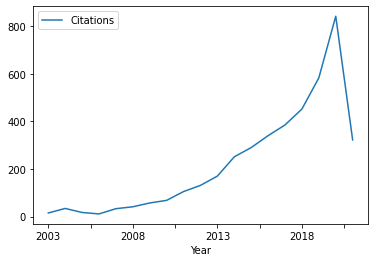

In [98]:
#Plot Graph
create_df["Citations"] = pd.to_numeric(create_df["Citations"])
create_df.plot()

## 6.Train Arima to predict the 2018 to 2020 citation

### 6.1 Train Arima Model
 <div class="alert alert-block alert-info">

**Code**: 
    You will need to use the create_df and then perform the
Arima training with parameter of $p=1$, $q=1$ and $d=1$ on data from 2003 to 2017 (15 years)
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [99]:
# your code to use create_df to split the data into train (year 2003 to 2017) and test
try: 
  from statsmodels.tsa.arima.model import ARIMA
except:
  !pip install statsmodels==0.11.1
  from statsmodels.tsa.arima.model import ARIMA
print (create_df.shape)
train=create_df.iloc[:-4]
test=create_df.iloc[15:18]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 8.7MB 7.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


(19, 1)


### 6.2 Predicting the citation and Calculate the RMSE
 <div class="alert alert-block alert-info">

**Code**: 
    you will need to use the trained Arime model to predict the citation on year 2018, 2019 and 2020.
You will need to perform the evaluation by comparing the predicted citation from 2018 to 2020 with 
the true citation from 2018 to 2020 and calculate the RMSE (root mean square error).
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [100]:
# your code to predict the citation and save it to variable preds. You may need to output the confidence interval(95%) here as well
train = train.dropna()
his = train
predictions = pd.DataFrame(columns=['Citations'])
predictions.index.name = 'Year'
lower_confidence_interval = []
upper_confidence_interval = []
for i in range(len(test['Citations'])):
  model=ARIMA(his['Citations'],order=(1,1,1))
  model=model.fit()
  result = model.get_forecast()
  output = result.predicted_mean["{}-01-01".format(test.index[i])]
  temp = pd.DataFrame(index=[test.index[i]], data={'Citations':output})
  temp.index.name = 'Year'
  predictions = predictions.append(temp)
  predictions=predictions.astype(int)
  temp = pd.DataFrame(index=[test.index[i]], data={'Citations':test['Citations'][i]})
  temp.index.name = 'Year'
  his = his.append(temp)
  ci = result.conf_int(0.05)
  upper_confidence_interval.append(ci['upper Citations'][0])
  lower_confidence_interval.append(ci['lower Citations'][0])
  print("Predicted: {} - {}".format(test.index[i], output.round()))
  print("Actual: {} - {}".format(test.index[i], test['Citations'][i]))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN

Predicted: 2018 - 427.0
Actual: 2018 - 452
Predicted: 2019 - 505.0
Actual: 2019 - 583
Predicted: 2020 - 683.0
Actual: 2020 - 842


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [101]:
# Print the error below by comparing the test and preds:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
rmse = sqrt(mean_squared_error(test['Citations'], predictions['Citations']))
print(rmse)
# Your code to show the performance RMSE

103.77700451769971


### 6.3 Draw the visualization to compare

 <div class="alert alert-block alert-info">

**Code**: 
   You will also need to use matplotlib to draw the line plot with training data from 2013 to 2017,
the testing truth, the prediction and also the confidence interval (95%). 
    <br>
    *Keep the outputs for code in your notebook.
</div>

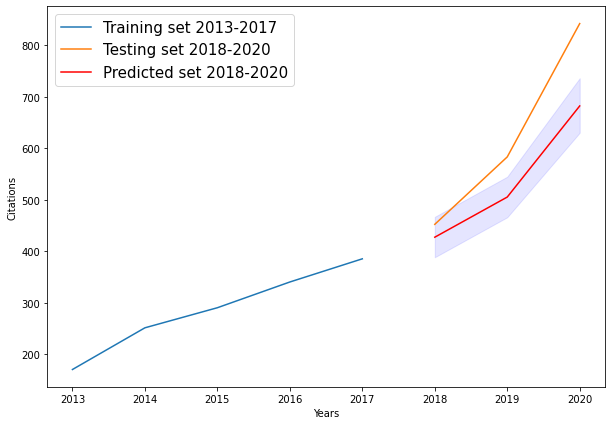

In [103]:
# You code: Visualize as required, the prediction with its confidence interval
plt.figure(figsize=[10,7])
plt.xlabel("Years")
plt.ylabel("Citations")
plt.plot(train.iloc[10:], label="Training set 2013-2017")
plt.legend(prop={'size': 15})
plt.plot(test, label="Testing set 2018-2020")
plt.legend(prop={'size': 15})
plt.plot(predictions, color='red', label="Predicted set 2018-2020")
plt.legend(prop={'size': 15})
fill_plot = []
for i in range(len(test)):
  fill_plot.append(i + len(train.iloc[10:]))
plt.fill_between(fill_plot, lower_confidence_interval, upper_confidence_interval,
                alpha=0.1, color='b')
plt.show()

## 7.Conduct the Grid Search with paramter selection and then predict the 2021 and 2022

### 7.1 Grid Search
 <div class="alert alert-block alert-info">

**Code**: 
  You will need to run the grid search for parameter $p=[1,2]$, 
$q=[1,2]$,
$d=[1,2]$
with training data on year 2003 to 2017 and testing data on 2018 to 2020
The result of the search on each paratemer combination (eg: p=1,q=1,d=1)
will need to be stored in the "search-results.csv",
The search-results.csv will have the column of "RMSE" and column "PARAMETER".
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [104]:
# your code to run grid search
#p = list(range(1,3))
#q = list(range(1,3))
#d = list(range(1,3))
#RMSE = []
#PARAMETER = []
p = list(range(1,3))
q = list(range(1,3))
d = list(range(1,3))
RMSE = []
PARAMETER = []
for i in p:
  for j in q:
    for k in d:
      his = train
      predictions = pd.DataFrame(columns=['Citations'])
      predictions.index.name = 'Year'
      pred = []
      for l in range(len(test['Citations'])):
        model=ARIMA(his['Citations'],order=(i,j,k))
        model=model.fit()
        result = model.get_forecast()
        output = result.predicted_mean["{}-01-01".format(test.index[l])]
        pred.append(output)
        temp = pd.DataFrame(index=[test.index[l]], data={'Citations':test['Citations'][l]})
        temp.index.name = 'Year'
        his = his.append(temp)
      rmse=sqrt(mean_squared_error(pred,test['Citations']))
      print(rmse)
      RMSE.append(rmse)
      print(i,j,k)
      PARAMETER.append([i,j,k])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN

103.22821843406842
1 1 1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local

103.70293212722883
1 1 2
97.64080433245938
1 2 1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local

94.37928764891339
1 2 2


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local

92.94960806431729
2 1 1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/

102.63629073980317
2 1 2


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local

106.22567551338939
2 2 1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local

104.27960528695584
2 2 2


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [106]:
# your code to generate the seach-results.csv and print the top 6 rows
#Results = pd.DataFrame({'RMSE':RMSE,'Parameter':PARAMETER})
#Results.head(6)
grid_data= {
    'PARAMETER': PARAMETER,
    'RMSE':RMSE
}
grid_df=pd.DataFrame(grid_data)
grid_df.head(6)
from google.colab import files
grid_df.to_csv('Search_results.csv') 
files.download('Search_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [155]:
kkia=grid_df.sort_values(by="RMSE",ascending=True, ignore_index=True)
print ('Best parameter values with least RMSE:'+"\n",kkia)

Best parameter values with least RMSE:
    PARAMETER        RMSE
0  [2, 1, 1]   92.949608
1  [1, 2, 2]   94.379288
2  [1, 2, 1]   97.640804
3  [2, 1, 2]  102.636291
4  [1, 1, 1]  103.228218
5  [1, 1, 2]  103.702932
6  [2, 2, 2]  104.279605
7  [2, 2, 1]  106.225676


In [110]:
kl= grid_df[ grid_df['RMSE'] == grid_df['RMSE'].min() ]
kl=kl.reset_index(drop=True)
print(kl)

   PARAMETER       RMSE
0  [2, 1, 1]  92.949608


### 7.2 TRAIN With Best Parameter Set with data up to 2020 and Predict the 2021 and 2022

<div class="alert alert-block alert-info">

**Code**: 
  You will need to perform the training with Arima on data from 2003 to 2020 with best parameter you have found in last task,
and then conduct the prediction for year 2021 and 2022.
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [157]:
# your code to perform the Arima train on data 2003 to 2020
#train = create_df.citation_all.values[:-1]
# Your code to predict for 2021 and 2022
new_train = create_df.iloc[:18]
his = new_train
predictions = pd.DataFrame(columns=['Citations'])
predictions.index.name = 'Year'
lower_confidence_interval = []
upper_confidence_interval = []

model=ARIMA(his['Citations'],order=(kl['PARAMETER'][0][0], kl['PARAMETER'][0][1], kl['PARAMETER'][0][2]))
model=model.fit()
result = model.get_forecast(steps=2)
output1 = result.predicted_mean["2021-01-01"]
output2 = result.predicted_mean["2022-01-01"]
temp = pd.DataFrame(index=['2021', '2022'], data=[{'Citations':output1}, {'Citations': output2}])
temp.index.name = 'Year'
predictions = predictions.append(temp)
predictions= round(predictions)
ci = result.conf_int(0.05)
upper_confidence_interval.append(ci['upper Citations'][0])
lower_confidence_interval.append(ci['lower Citations'][0])
upper_confidence_interval.append(ci['upper Citations'][1])
lower_confidence_interval.append(ci['lower Citations'][1])
print(predictions)



      Citations
Year           
2021     1152.0
2022     1478.0


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<div class="alert alert-block alert-info">

**Code**: 
  You will also need to use matplotlib to draw the line plot with training data from 2013 to 2020, the prediction and also the confidence interval (95%).
    <br>
    *Keep the outputs for code in your notebook.
</div>

      Citations
Year           
2021     1152.0
2022     1478.0


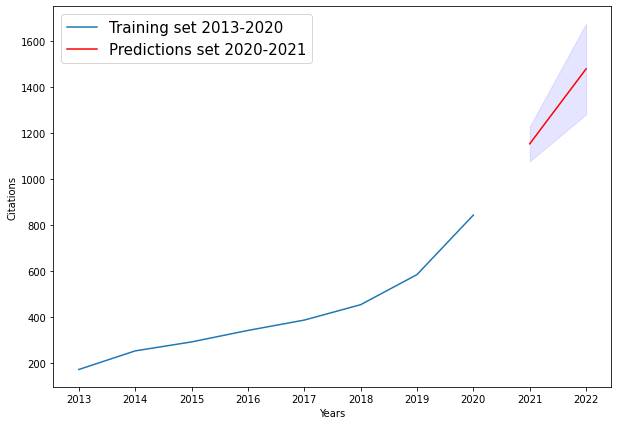

In [158]:
# Plot the points and the prediction with its confidence interval
print(predictions)
plt.figure(figsize=[10,7])
plt.xlabel("Years")
plt.ylabel("Citations")
plt.plot(new_train.iloc[10:], label="Training set 2013-2020")
plt.legend(loc='upper left', prop={'size':15})
plt.plot(predictions, color='red', label="Predictions set 2020-2021")
plt.legend(loc='upper left', prop={'size':15})
fill_plot = []
for i in range(2):
  fill_plot.append(i + len(new_train.iloc[10:]))
plt.fill_between(fill_plot, lower_confidence_interval, upper_confidence_interval,
                alpha=0.1, color='b')
plt.show()



# Part III - Self-Reflective Essay

## Overview

Please check the assessment task specification details.
